In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Assuming 'sales_data.csv' is your dataset file
df = pd.read_csv('/Users/rajanandinialla/Desktop/sales dataset /CRM+Sales+Opportunities/sales_pipeline.csv')


In [44]:


# Assuming df is your DataFrame
sample_size = df.shape[0]

print("Sample size:", sample_size)


Sample size: 8801


In [45]:

# Assuming df is your DataFrame
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 8801
Number of columns: 8


In [46]:
print(df.describe())


        close_value
count   8801.000000
mean    1136.863311
std     2123.442544
min        0.000000
25%        0.000000
50%        0.000000
75%     1085.000000
max    30288.000000


In [47]:
import pandas as pd

# Assuming df is your DataFrame containing sales data
# Convert 'date' column to datetime format, coerce errors to NaT
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce')

# Filter out rows with NaT (optional)
df = df[df['close_date'].notnull()]

# Now you can use the 'df' DataFrame for analysis


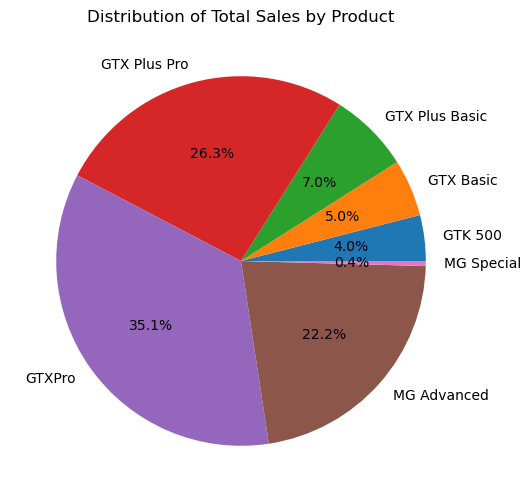

In [48]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sales_by_product = df.groupby('product')['close_value'].sum()

# Create a pie chart with percentage labels
plt.figure(figsize=(10, 6))
plt.pie(sales_by_product, labels=sales_by_product.index, autopct='%1.1f%%')
plt.title('Distribution of Total Sales by Product')
plt.show()


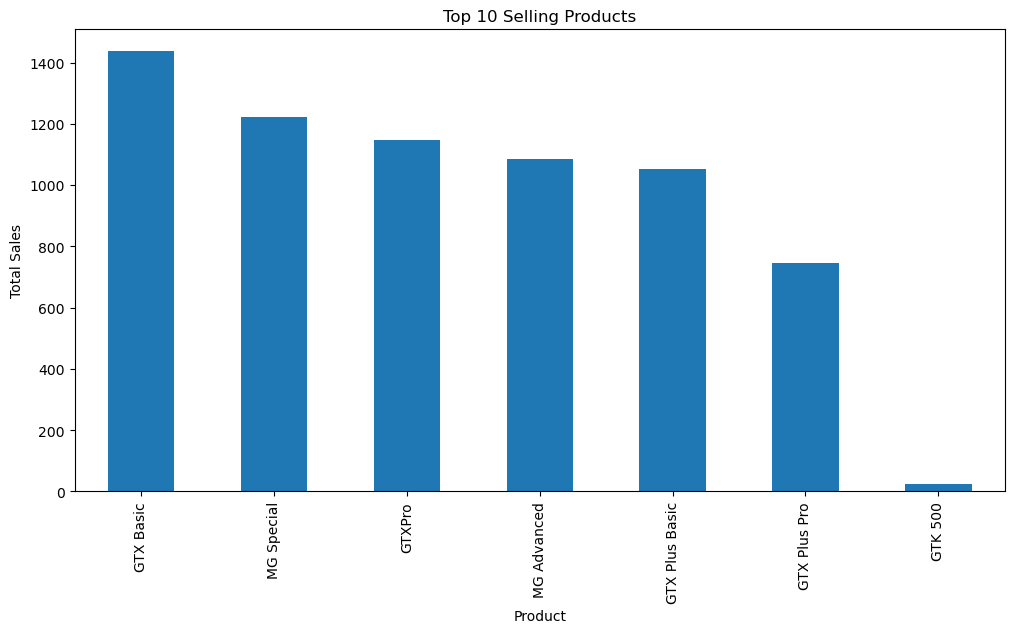

In [49]:
plt.figure(figsize=(12, 6))
df.groupby('product')['account'].count().nlargest(10).plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()



In [50]:
# Group by 'product' and 'year' and calculate the count of sales
yearly_sales_count = df.groupby(['product', 'year'], as_index=False)['close_value'].count()

# Fill missing values with 0
yearly_sales_count = yearly_sales_count.fillna(0)

print(yearly_sales_count)


KeyError: 'year'

In [56]:
# Assuming df is your DataFrame containing sales data
# Convert 'close_date' column to datetime format if it's not already
df['close_date'] = pd.to_datetime(df['close_date'])

# Extract year from the 'close_date' column
df['year'] = df['close_date'].dt.year

# Find unique years in the dataset
unique_years = df['year'].unique()

print("Unique years in the dataset:", unique_years)


Unique years in the dataset: [2017]


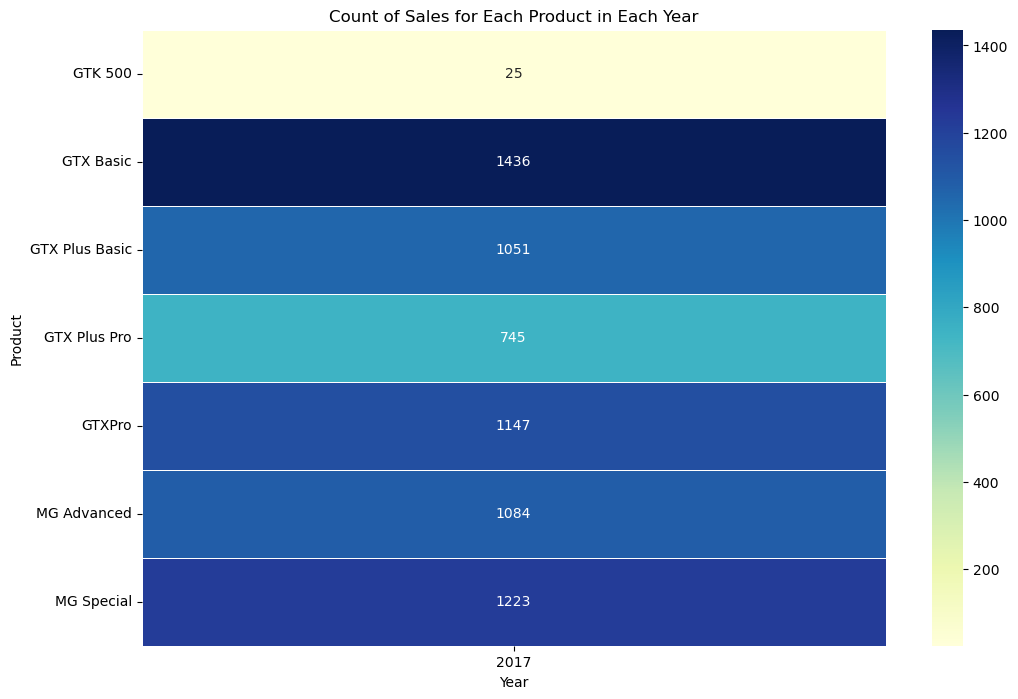

In [57]:
yearly_sales_count_df = yearly_sales_count.reset_index(name='count')

# Create a pivot table to have years as columns and products as rows
heatmap_data = yearly_sales_count_df.pivot(index='product', columns='year', values='count')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Count of Sales for Each Product in Each Year')
plt.xlabel('Year')
plt.ylabel('Product')
plt.show()

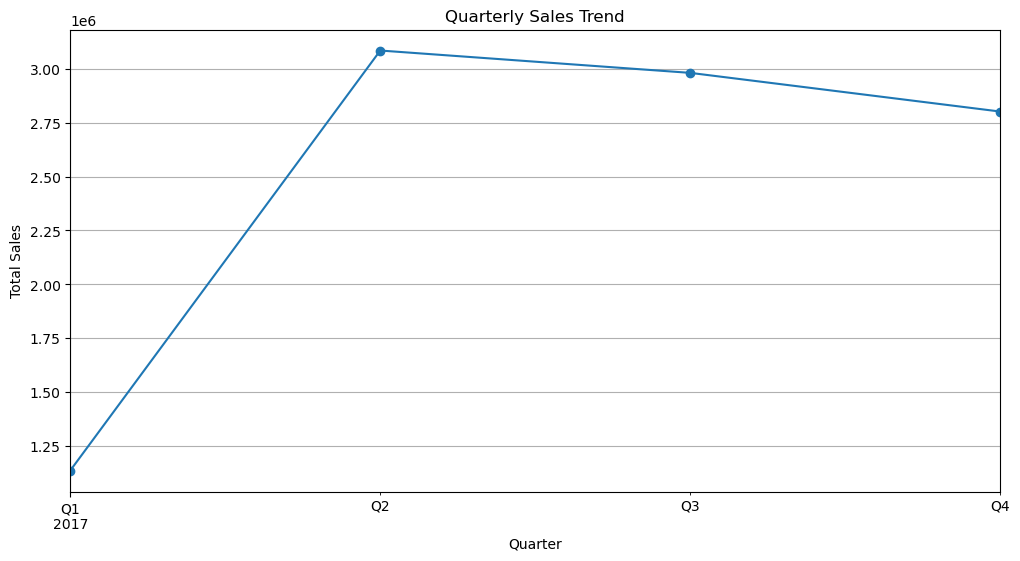

In [61]:

#Can you identify any quarter-over-quarter trends?

df['quarter'] = df['close_date'].dt.to_period('Q')

# Group by quarter and calculate total sales
quarterly_sales = df.groupby('quarter')['close_value'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

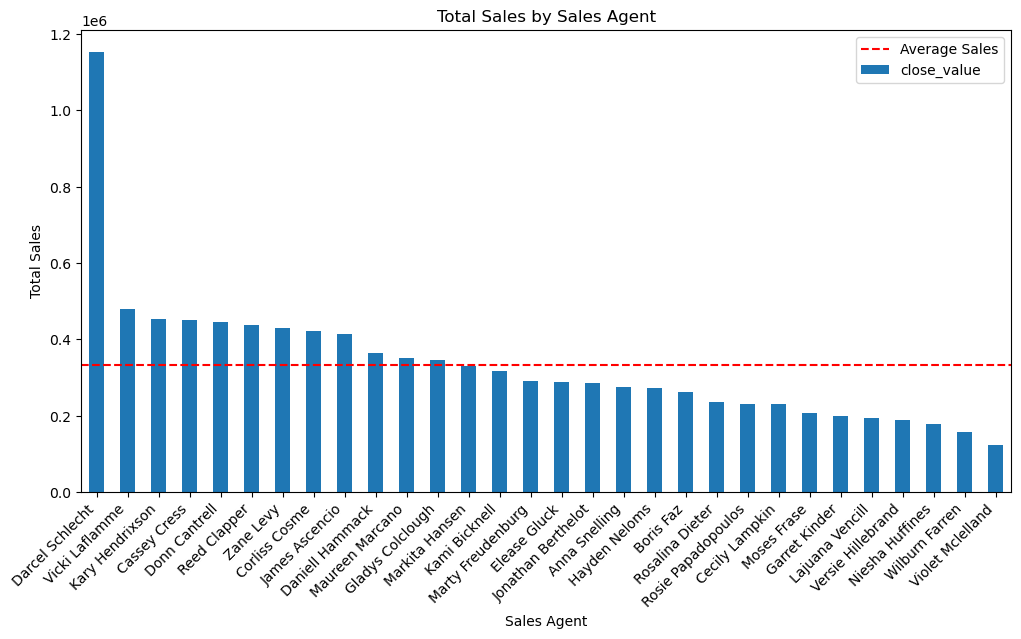

Lagging Agents:
sales_agent
Markita Hansen        328792
Kami Bicknell         316456
Marty Freudenburg     291195
Elease Gluck          289195
Jonathan Berthelot    284886
Anna Snelling         275056
Hayden Neloms         272111
Boris Faz             261631
Rosalina Dieter       235403
Rosie Papadopoulos    230169
Cecily Lampkin        229800
Moses Frase           207182
Garret Kinder         197773
Lajuana Vencill       194632
Versie Hillebrand     187693
Niesha Huffines       176961
Wilburn Farren        157640
Violet Mclelland      123431
Name: close_value, dtype: int64


In [62]:
#Are any sales agents lagging behind?



# Assuming df is your DataFrame containing the sales data
# Group by sales agent and calculate total sales
sales_by_agent = df.groupby('sales_agent')['close_value'].sum().sort_values(ascending=False)

# Calculate the average sales
average_sales = sales_by_agent.mean()

# Plot the data
plt.figure(figsize=(12, 6))
sales_by_agent.plot(kind='bar')
plt.axhline(y=average_sales, color='r', linestyle='--', label='Average Sales')
plt.title('Total Sales by Sales Agent')
plt.xlabel('Sales Agent')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Identify lagging agents (sales below average)
lagging_agents = sales_by_agent[sales_by_agent < average_sales]
print("Lagging Agents:")
print(lagging_agents)


In [64]:
# Assuming df is your DataFrame containing the sales data
# Map 'won' to 1, 'lost' to 0, and 'engaging' to 0
df['deal_stage_binary'] = df['deal_stage'].map({'won': 1, 'lost': 0, 'engaging': 0})

print(df[['deal_stage', 'deal_stage_binary']])


     deal_stage  deal_stage_binary
0           Won                NaN
1           Won                NaN
3          Lost                NaN
4          Lost                NaN
5           Won                NaN
...         ...                ...
7367        Won                NaN
7368       Lost                NaN
7369       Lost                NaN
7370       Lost                NaN
7371        Won                NaN

[6711 rows x 2 columns]


In [66]:
# Clean up the 'deal_stage' column to remove extra whitespace and convert to lowercase
df['deal_stage'] = df['deal_stage'].str.strip().str.lower()

# Map 'won' to 1, 'lost' to 0, and 'engaging' to 0
df['deal_stage_binary'] = df['deal_stage'].map({'won': 1, 'lost': 0, 'engaging': 0})

print(df[['deal_stage', 'deal_stage_binary']])


     deal_stage  deal_stage_binary
0           won                  1
1           won                  1
3          lost                  0
4          lost                  0
5           won                  1
...         ...                ...
7367        won                  1
7368       lost                  0
7369       lost                  0
7370       lost                  0
7371        won                  1

[6711 rows x 2 columns]


In [67]:


# Assuming df is your DataFrame containing the sales data
# Group by product and calculate the total number of deals and the number of won deals for each product
product_deals = df.groupby('product')['deal_stage'].count()
product_won_deals = df[df['deal_stage'] == 'won'].groupby('product')['deal_stage'].count()

# Calculate win rates
product_win_rates = product_won_deals / product_deals

# Sort products by win rate
product_win_rates = product_win_rates.sort_values(ascending=False)

print("Products with Better Win Rates:")
print(product_win_rates)


Products with Better Win Rates:
product
MG Special        0.648406
GTX Plus Pro      0.642953
GTX Basic         0.637187
GTXPro            0.635571
GTX Plus Basic    0.621313
MG Advanced       0.603321
GTK 500           0.600000
Name: deal_stage, dtype: float64
